In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def load_all_data_from_folder(folder_path):
    all_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".csv")])
    df_list = [pd.read_csv(os.path.join(folder_path, file), parse_dates=["data_hora_gmt"]) for file in all_files]
    df = pd.concat(df_list, ignore_index=True)
    return df
    

#  Análise Exploratória de Dados (EDA)
Nesta seção, realizaremos uma análise exploratória de dados (EDA) no conjunto de dados que contém informações sobre incêndios florestais no Brasil. O dataset foi obtido da plataforma TerraBrasilis, que disponibiliza dados abertos sobre queimadas:

https://terrabrasilis.dpi.inpe.br/queimadas/portal/ 


O conjunto de dados inclui informações detalhadas, como data, hora e localização das ocorrências de incêndios, além de outros atributos relevantes. Esta análise tem como objetivo descobrir padrões, tendências e insights que nos ajudem a entender melhor a dinâmica dos incêndios no Brasil.

In [24]:
df_input = load_all_data_from_folder('data/')

In [29]:
df=df_input.copy()

In [30]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13040917 entries, 0 to 13040916
Data columns (total 16 columns):
 #   Column                 Non-Null Count     Dtype         
---  ------                 --------------     -----         
 0   id                     13040917 non-null  object        
 1   lat                    13040917 non-null  float64       
 2   lon                    13040917 non-null  float64       
 3   data_hora_gmt          13040917 non-null  datetime64[ns]
 4   satelite               13040917 non-null  object        
 5   municipio              13040917 non-null  object        
 6   estado                 13040917 non-null  object        
 7   pais                   13040917 non-null  object        
 8   municipio_id           13040917 non-null  int64         
 9   estado_id              13040917 non-null  int64         
 10  pais_id                13040917 non-null  int64         
 11  numero_dias_sem_chuva  12742097 non-null  float64       
 12  precipitacao

In [43]:
df.describe(include='all')

,id,lat,lon,satelite,municipio,estado,municipio_id,estado_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp,date,day_of_year,month,weekday,cos_day_of_year
count,13040917,1.304092e+07,1.304092e+07,13040917,13040917,13040917,1.304092e+07,1.304092e+07,1.274210e+07,1.274210e+07,1.274210e+07,13040910,1.256086e+07,13040917,1.304092e+07,1.304092e+07,1.304092e+07,1.304092e+07
unique,13040917,NaN,NaN,17,5278,27,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN
top,8c3be1cf-55a4-3d95-9e1d-6edbbb9985c9,NaN,NaN,NOAA-20,ALTAMIRA,PARÁ,NaN,NaN,NaN,NaN,NaN,Amazônia,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,3325393,346186,2843121,NaN,NaN,NaN,NaN,NaN,6840529,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-9.704628e+00,-5.271224e+01,NaN,NaN,NaN,2.706081e+06,2.699236e+01,1.873836e+01,6.776509e-01,-9.261592e+00,NaN,3.878496e+01,2024-04-28 07:52:19.956064768,2.436230e+02,8.496610e+00,3.008868e+00,-1.631109e-01
min,NaN,-3.373356e+01,-7.386338e+01,NaN,NaN,NaN,1.100015e+06,1.100000e+01,-9.990000e+02,0.000000e+00,-9.990000e+02,NaN,-3.800000e+00,2023-01-01 01:13:30,1.000000e+00,1.000000e+00,0.000000e+00,-9.999630e-01
25%,NaN,-1.320920e+01,-5.749887e+01,NaN,NaN,NaN,1.503606e+06,1.500000e+01,4.000000e+00,0.000000e+00,6.000000e-01,NaN,3.800000e+00,2023-10-21 23:05:24,2.240000e+02,8.000000e+00,1.000000e+00,-6.321034e-01
50%,NaN,-8.963900e+00,-5.274302e+01,NaN,NaN,NaN,2.103505e+06,2.100000e+01,1.100000e+01,0.000000e+00,1.000000e+00,NaN,1.020000e+01,2024-08-07 03:57:00,2.510000e+02,9.000000e+00,3.000000e+00,-3.008198e-01
75%,NaN,-6.028600e+00,-4.704399e+01,NaN,NaN,NaN,5.002100e+06,5.000000e+01,3.900000e+01,0.000000e+00,1.000000e+00,NaN,5.790000e+01,2024-09-12 16:56:00,2.830000e+02,1.000000e+01,5.000000e+00,3.090170e-01
max,NaN,5.217610e+00,-3.479613e+01,NaN,NaN,NaN,5.300108e+06,5.300000e+01,1.200000e+02,2.529800e+02,1.000000e+00,NaN,8.094300e+03,2025-05-14 23:56:00,3.660000e+02,1.200000e+01,6.000000e+00,1.000000e+00


# Descrição do Conjunto de Dados

Este conjunto de dados fornece informações abrangentes sobre incêndios florestais no Brasil, cobrindo o período de 2023 até maio de 2025. Ele inclui atributos detalhados relacionados à localização, data/hora e características das ocorrências de incêndio. Abaixo está uma visão geral das colunas do dataset:

- **id**: Identificador único para cada registro de incêndio.
- **lat**: Coordenada de latitude da ocorrência do incêndio.
- **lon**: Coordenada de longitude da ocorrência do incêndio.
- **data_hora_gmt**: Data e hora da ocorrência do incêndio em GMT.
- **satelite**: Satélite responsável por detectar o incêndio.
- **municipio**: Município onde o incêndio ocorreu.
- **estado**: Estado onde o incêndio ocorreu.
- **pais**: País da ocorrência do incêndio (todos os registros são do Brasil).
- **municipio_id**: Identificador único do município.
- **estado_id**: Identificador único do estado.
- **pais_id**: Identificador único do país.
- **numero_dias_sem_chuva**: Número de dias consecutivos sem chuva antes da ocorrência do incêndio.
- **precipitacao**: Nível de precipitação (em mm) registrado no momento do incêndio.
- **risco_fogo**: Índice de risco de fogo, indicando a probabilidade de ocorrência de incêndio.
- **bioma**: Bioma onde o incêndio ocorreu.
- **frp**: Potência Radiativa do Fogo (FRP) em megawatts (MW), representando a energia radiante liberada por unidade de tempo, a qual está correlacionada com a taxa de queima da vegetação.

Adicionalmente, as colunas **numero_dias_sem_chuva**, **precipitacao** e **risco_fogo** são atualizadas diariamente ao final de cada dia, garantindo que os dados permaneçam atualizados e precisos.

É possível observar que as colunas **numero_dias_sem_chuva**, **precipitacao**, **risco_fogo** e **frp** possuem valores nulos, indicando que há dados ausentes que não foram atualizados.


In [31]:
df['date'] = pd.to_datetime(df['data_hora_gmt'],format="%Y-%m-%d")
df = df.drop(['data_hora_gmt', 'pais', 'pais_id'],axis=1)

## feature engineering
Adicionando algumas feature para auxiliar na análise

In [33]:
def encode_day_of_year_cyclic(day_of_year):
    """
    Encodes the day of the year (1–366) using a cosine transformation to capture its cyclical nature.

    This approach is useful because days of the year are cyclical — day 1 and day 365 are 
    temporally adjacent, but numerically far apart. Traditional models don't account for this 
    cyclical relationship. By projecting the day onto a unit circle using a cosine function, 
    we preserve the seasonal structure and continuity of the time variable.

    The transformation maps each day to a point on a circle, where similar times of the year 
    produce similar values, making it easier for machine learning models to learn seasonal patterns.

    Parameters:
        day_of_year (int): The day of the year, ranging from 1 to 366.

    Returns:
        float: Cosine-encoded value representing the cyclical position of the day.
    """
    return np.cos(2 * np.pi * day_of_year / 365)


In [46]:
df["day_of_year"] = df["date"].dt.dayofyear
df["month"] = df["date"].dt.month
df["weekday"] = df["date"].dt.weekday
df['year'] = df['date'].dt.year
df["cos_day_of_year"] = encode_day_of_year_cyclic(df["day_of_year"])


## Analysis


### Risk of fire

Existem alguns valores de -999 nos campos de risco_fogo. De acordo com o website Terrabrasilis o atributo "RiscoFogo" dos focos é o valor do Risco de Fogo previsto para o mesmo dia da ocorrência do foco, onde os valores são válidos de 0 a 1 e, o número -999 representa valor inválido, normalmente relacionado como área urbana ou corpos d'água, onde não faz sentido calcular o Riso de Fogo. Desta forma estes dados serão retirados do dataset

In [50]:
df = df[df.risco_fogo>0]

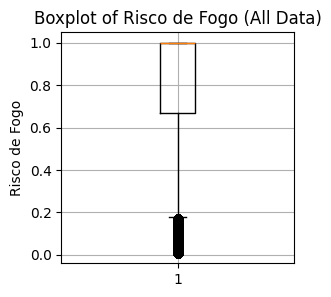

In [52]:
plt.figure(figsize=(3, 3))
plt.boxplot(df['risco_fogo'].dropna())
plt.title('Boxplot of Risco de Fogo (All Data)')
plt.ylabel('Risco de Fogo')
plt.grid(True)
plt.show()


O intervalo interquartil do risco de fogo está entre 0.7 e 1.0 — indicando uma tendência alta de risco, sendo que a mediana está muito próxima de 1. Isto indica que pelo menos metade dos dados representam locais com risco máximo.

Existem alguns valores baixos e outliers, mas são minoria.

Isso sugere que o risco de fogo frequentemente é muito alto nos dados analisados — o que pode estar associado a época do ano, região, ou condições ambientais.

### Datas

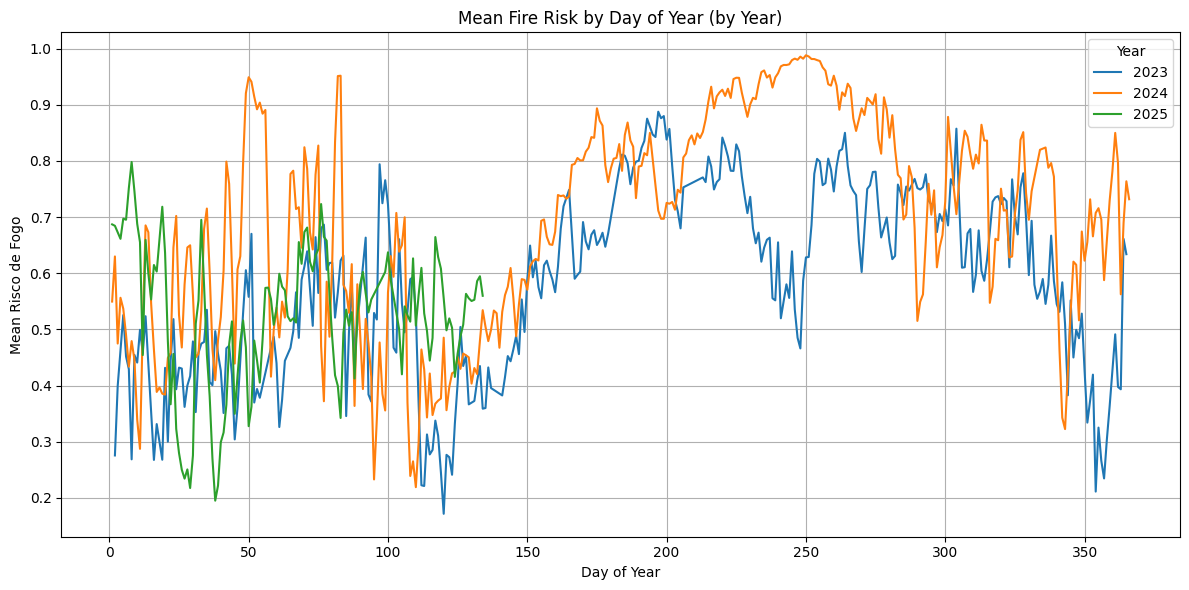

In [55]:

mean_risk_by_year = df.groupby(['year', 'day_of_year'])['risco_fogo'].mean().reset_index()

plt.figure(figsize=(12, 6))
for year in mean_risk_by_year['year'].unique():
    data = mean_risk_by_year[mean_risk_by_year['year'] == year]
    plt.plot(data['day_of_year'], data['risco_fogo'], label=str(year))

plt.title('Mean Fire Risk by Day of Year (by Year)')
plt.xlabel('Day of Year')
plt.ylabel('Mean Risco de Fogo')
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


A imagem mostra um gráfico de linha do tempo do risco médio de fogo por ano. 
Permite observar padrões sazonais de risco de fogo ao longo do ano. Sendo possível observar um aumento do risco geral a partir do 2 semestre do ano e com queda no final do ano.
É interessante observar que em 2024 ocorreu um aumento do risco com relação ao ano anterior. 
2025 conta apenas com dados para o início do ano (até ~dia 130). O risco varia entre 0.3 e 0.7 — similar a outros anos no início do período.

**Conclusões:**
- O gráfico mostra um padrão sazonal claro de aumento do risco de fogo no segundo semestre do ano.

- O ano de 2024 teve picos mais altos e pode ter sido um ano de maior severidade em termos de risco de fogo.




## Biomas

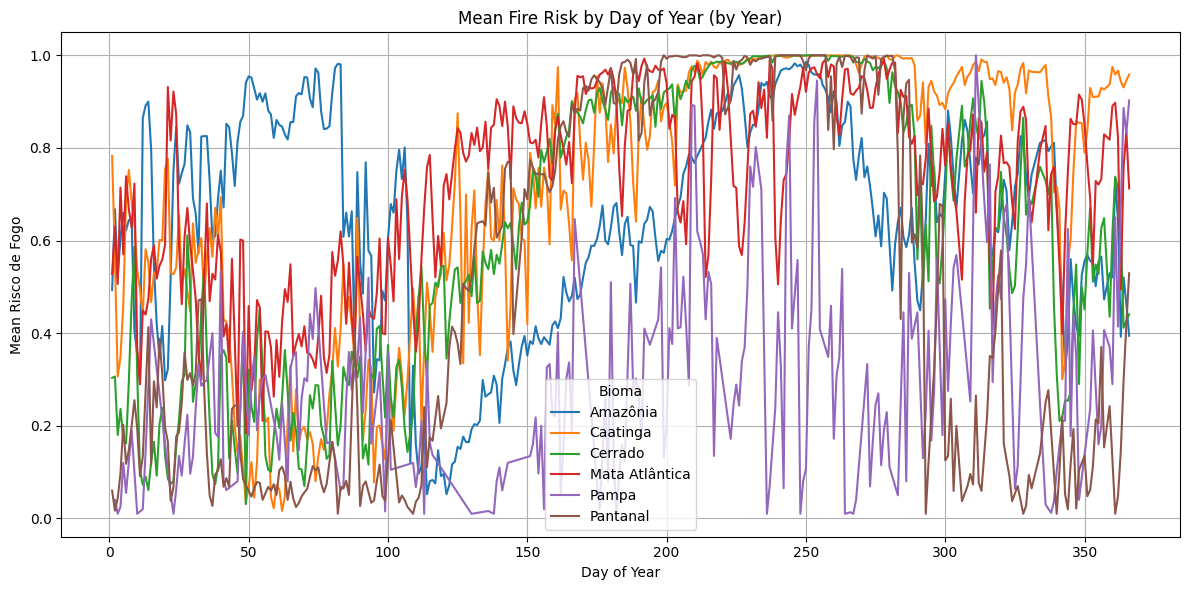

In [57]:

mean_risk_by_bioma = df[df.year==2024].groupby(['bioma', 'day_of_year'])['risco_fogo'].mean().reset_index()

plt.figure(figsize=(12, 6))
for b in mean_risk_by_bioma['bioma'].unique():
    data = mean_risk_by_bioma[mean_risk_by_bioma['bioma'] == b]
    plt.plot(data['day_of_year'], data['risco_fogo'], label=str(b))

plt.title('Mean Fire Risk by Day of Year (by Year)')
plt.xlabel('Day of Year')
plt.ylabel('Mean Risco de Fogo')
plt.grid(True)
plt.legend(title='Bioma')
plt.tight_layout()
plt.show()


Existe um total de  27 estados , 5278 cidades e 6 biomas representados no dataset. 
